### Fake News Classification

Objective of this project is to build a classifier which can distinguish between news if it is fake or not using past data as learning model.\
Data is obtained from Kaggels challenge : [Data Source](https://www.kaggle.com/c/fake-news/data)

<b>Data contain 5 labels: <b> 
    
id : which unique for each news article\
title : the title of the news article\
author: author of the news article\
text: the test of news article\
labels: A label which marks article as potentially unreliable\
       1: unreliable\
       0: reliable


Dataset contain 3 csv files representing:\
train.csv > contain training data with label information.\
test.csv > contain above mentioned all columns except label information.\
submit.csv > contain information about test labels matched with there article index values.\

In [401]:
import pandas as pd 
import pandasql as sqldf

In [402]:
train_df = pd.read_csv('train.csv')

In [403]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [404]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Before moving ahead we will check records where we have null or NA or None is present in the data and will drop such records 

In [405]:
#number of records in training dataset
print(f'Number of samples in dataset are {train_df.shape[0]}')

Number of samples in dataset are 20800


In [406]:
#drop na rows 
train_df = train_df.dropna()

In [407]:
print(f'Number of samples after droping NaN are {train_df.shape[0]}')

Number of samples after droping NaN are 18285


In [408]:
print(len(pd.unique(train_df['id'])))

18285


In [409]:
train_df = train_df.drop(['id'], axis=1)

In [410]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   18285 non-null  object
 1   author  18285 non-null  object
 2   text    18285 non-null  object
 3   label   18285 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 714.3+ KB


From above it can be seen that id is just index and it donot hold any specific info about author or title of article, so dropping this as it is not providing any additional information and we already have dataframe's indexing. 

In [411]:
#checking number of unique authors in the dataset 
print(len(pd.unique(train_df['author']))) 

3838


It can be seen that for given data most of the article are from repeated authors instead of unique articles per author.

In [412]:
print(len(pd.unique(train_df['title'])))

17931


It is intresting to see that even when we have 18285 records we have articles which is repeated and not unique in this sense, thus looking for articles which are not unique.

In [413]:
train_df2 = train_df.copy(deep = True)

In [414]:
train_df2 = train_df2.groupby(['title' , 'author' , 'label']).size().reset_index().rename(columns={0:'count'})

In [415]:
train_df2.head()

,title,author,label,count
0,"""Allahu Akbar, the Russians are here!"": Aleppo...",Jafe Arnoldski (noreply@blogger.com),1,1
1,"""Authoritarianism"": How the West demonizes str...",Jafe Arnoldski (noreply@blogger.com),1,1
2,"""Donald, willst du mich heiraten?"": Clinton ha...",noreply@blogger.com (Der Postillon),1,1
3,"""Europe Has No Future"" Putin Slams Austria Mig...",The European Union Times,1,1
4,"""Fake News"" About Trump Continues Unabated",b,1,1


In [416]:
print(f'Length of unique combination of title, author and label is {len(train_df2)} and total sample lenght is {len(train_df)}')

Length of unique combination of title, author and label is 18121 and total sample lenght is 18285


From above it can be seen that even though we have number of unique title is not equivalent to number of sampels, we do not have much of difference with combination of title author and labels so not removing anything from there.

* Checking for authors with respect to there article count in fake news.

Looking for relationship between author name and how many news with them is classified as fake or unreliable. 

In [417]:
train_df3 = train_df.copy(deep = True)
train_df3 = train_df3.groupby(['author' , 'label']).size().reset_index().rename(columns={0:'count'})

In [418]:
train_fake_label = train_df3.loc[train_df3['label'] == 1].sort_values(by = ['count'], ascending=False)

In [419]:
train_fake_label.head(30)

,author,label,count
3657,admin,1,193
2755,Pakalert,1,86
1039,Eddy Lavine,1,85
3286,Starkman,1,84
132,Alex Ansary,1,82
1290,Gillian,1,82
1040,Editor,1,81
3754,noreply@blogger.com (Alexander Light),1,80
892,Dave Hodges,1,77
1411,IWB,1,75


* From above it can be seen that author names are 

It can be seen that most of the fake news article in dataset donot have any specific author name associated with it, for instance looking considering name as admin, Pakalert, Editor, IWB, -NO AUTHOR-, wmw_admin and many others. This make practicle sense as most of the fake news donot have any correct source of origin. 

* From below:

While if we look at from frequency count of most of the values in bottom table, it can be seen that records generated have name which directly identify single point of contact, what I mean if we look for someone with Name : Pam Key over internet there is a possibility of finding some person with this name while admin do not make sense. So author name looks like important feature while making classification about the article. 

In [420]:
train_not_fake_label = train_df3.loc[train_df3['label'] == 0].sort_values(by = ['count'], ascending=False)
train_not_fake_label.head(30)

,author,label,count
2760,Pam Key,0,242
1645,Jerome Hudson,0,166
687,Charlie Spiering,0,141
1727,John Hayward,0,140
1947,Katherine Rodriguez,0,124
3583,Warner Todd Huston,0,122
1417,Ian Hanchett,0,119
549,Breitbart News,0,118
866,Daniel Nussbaum,0,112
35,AWR Hawkins,0,107


In [421]:
from pandasql import sqldf

In [422]:
df = sqldf("select a.author as author, a.label , b.label from train_df a , train_df b where a.label = 1 and b.label = 0 and a.author = b.author group by a.author")

In [423]:
df 

,author,label,label
0,AFP,1,0
1,Ann Coulter,1,0
2,Pam Key,1,0
3,Pamela Geller,1,0
4,Reuters,1,0


In [424]:
train_df3.loc[train_df3.author.isin(list(df.author))].sort_values(by = ['author'])

,author,label,count
29,AFP,0,2
30,AFP,1,1
304,Ann Coulter,0,16
305,Ann Coulter,1,5
2760,Pam Key,0,242
2761,Pam Key,1,1
2766,Pamela Geller,0,1
2767,Pamela Geller,1,4
2983,Reuters,0,4
2984,Reuters,1,2


From above values, it is possible to conclude that we only have 5 authors where they have entry in both classes, i.e. and there also they have less number of entry in opposite class compared to its dominating count values agaist a label.

#### Word cloud for articles headline and text labelled as Fake or not

In [425]:
headlines_label_fake = train_df.loc[train_df['label'] == 1].title
headlines_label_fake = ' '.join(headlines_label_fake).lower()
wordcloud_fake_headline = WordCloud(stopwords= STOPWORDS, collocations=True).generate(headlines_label_fake)

articles_label_fake = train_df.loc[train_df['label'] == 1].text
articles_label_fake = ' '.join(articles_label_fake).lower()
wordcloud_fake = WordCloud(stopwords= STOPWORDS, collocations=True).generate(articles_label_fake)



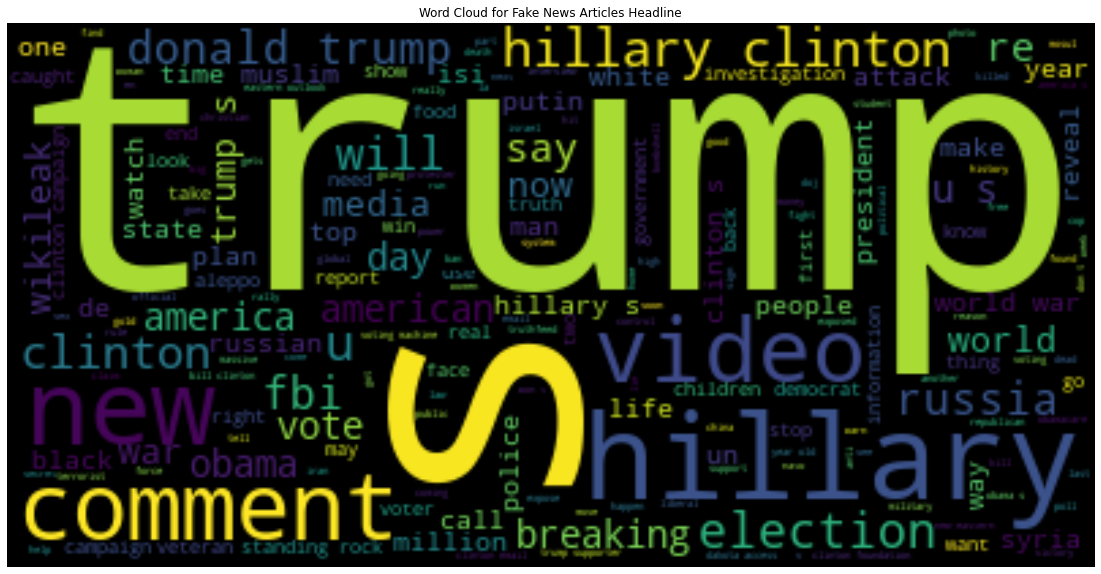

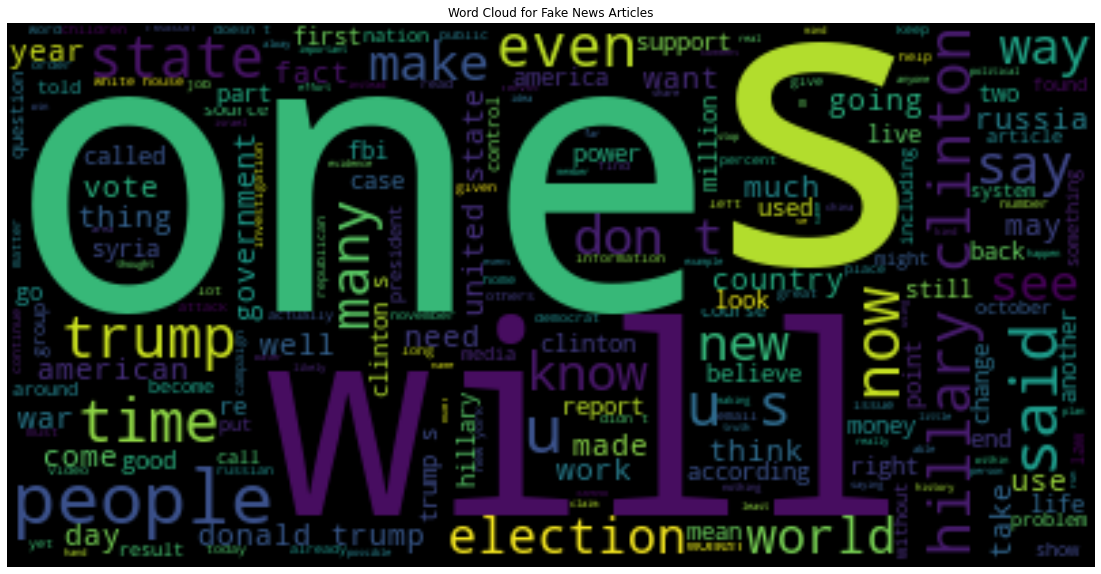

In [426]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_fake_headline, interpolation='bilInear')
plt.title('Word Cloud for Fake News Articles Headline')
plt.axis('off')
plt.show()


plt.figure(figsize=(20,10))
plt.imshow(wordcloud_fake, interpolation='bilInear')
plt.title('Word Cloud for Fake News Articles')
plt.axis('off')
plt.show()

It can be seen from above fake news plot that most of the news articles we have are associated with United State politics and its politicians, also data looks to resemble 2016 US President Election time when there was surge in fake news articles cocerning to Democratics parties Hillary Clinton and Republican Donald Trump. 

In [427]:
headlines_label_not_fake = train_df.loc[train_df['label'] == 0].title
headlines_label_not_fake = ' '.join(headlines_label_not_fake).lower()
wordcloud_not_fake_headline = WordCloud(stopwords= STOPWORDS, collocations=True).generate(headlines_label_not_fake)

articles_label_not_fake = train_df.loc[train_df['label'] == 0].text
articles_label_not_fake = ' '.join(articles_label_not_fake).lower()
wordcloud_not_fake = WordCloud(stopwords= STOPWORDS, collocations=True).generate(articles_label_not_fake)

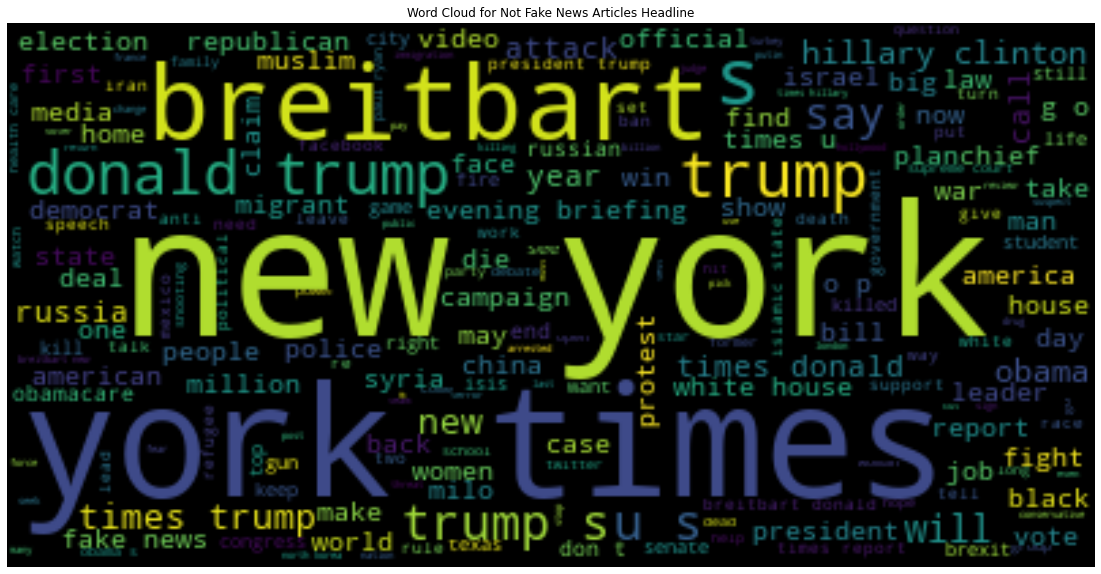

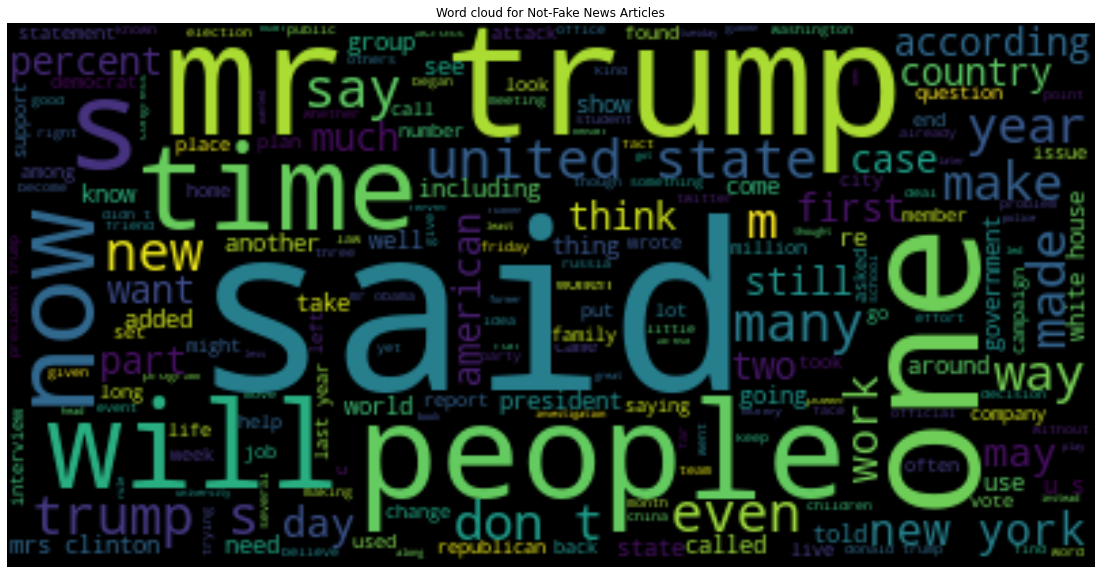

In [428]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_not_fake_headline, interpolation='bilInear')
plt.title('Word Cloud for Not Fake News Articles Headline')
plt.axis('off')
plt.show()


plt.figure(figsize=(20,10))
plt.imshow(wordcloud_not_fake, interpolation='bilInear')
plt.axis('off')
plt.title('Word cloud for Not-Fake News Articles')
plt.show()



Looking at word cloud of articles which are marked not fake are comparetivelly have less name calling(only trump's mentions is there which in terms of name in word cloud) looks more like discussion on future promisses of things which can be seen in terms of words like make , want , world etc. As it has been seen previously while looking at author's who have written fake news articles, mostly with them we donot have clear name so we donot have meangful end point associted with them which lookd like gave them freedom to write about anything which help them in spreading there agenda. 

Thus from word cloud of both type of articles, it can be seen that they both follow very different word frequencies while addressing same objective, which I guess is president Election 2016.

### Checking for label balance in the dataset

Now after understading the data and removing null records, this data can be use for future model creation and inorder to have balance model we need to have balance in the datasets in terms of number of articles associated with both classes. 

Below is the count histogram for both labels

Text(0.5, 1.0, 'Number of data samples against each class')

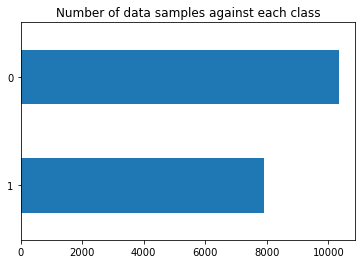

In [429]:
train_df.label.value_counts().sort_values().plot(kind = 'barh')
plt.title('Number of data samples against each class')

From above plot we can see that we have sufficiently large samples of both the classes and selective downsampling for majority class (i.e. 0 Not Fake artice) is not required. 

### Classifier Modeling

In order to build fake news classifier, two models have been selected one is Logistic Regression as baseline and other one is Recurrent Neural Network. 

In [430]:
import spacy
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import joblib

In [431]:
nlp = spacy.load("en_core_web_lg")

In [432]:
# importing test data
testdf_woLabel1 = pd.read_csv("test.csv", engine="python", encoding= "UTF-8")
testLabels = pd.read_csv("submit.csv", engine="python", encoding= "UTF-8")
testdf = pd.merge(testdf_woLabel1 , testLabels , on = ['id'])
testdf = testdf.dropna()
testdf = testdf.drop(['id'], axis = 1)

In [433]:
testdf.head()

,title,author,text,label
0,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
2,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
6,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1


In [434]:
print(f'Number of samples in test data is {testdf.shape[0]}')

Number of samples in test data is 4575


In [435]:
# Spliting data into train_X , train_Y , test_X and test_Y
train_data = train_df.copy(deep = True)
test_data  = testdf.copy(deep = True)

Using three features namely title, author and text for prediction of labels so making a combined set of these values.


In [535]:
train_X = train_data.title + ' ' + train_data.author + ' ' + train_data.text
train_y = train_data.label

test_X = test_data.title + ' ' + test_data.author + ' ' + test_data.text
test_y = test_data.label

In [536]:
train_X.head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2    Why the Truth Might Get You Fired Consortiumne...
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
dtype: object

In [537]:
train_y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

### Baseline Model

Selecting logistic regresssion as baseline model

In [439]:
logistic_Pipeline = Pipeline([
                                ('vectorizer' , CountVectorizer(stop_words = 'english' , analyzer= 'word' , lowercase= True)),
                                ('logisticModel' , LogisticRegression(dual = False , random_state = 12345))  
                                     ])

hyperPara_Logistic = {                 
              'logisticModel__C': [1, 5, 10, 15, 20, 25, 30], 
              'logisticModel__max_iter' : [5000] ,   
              #'logisticModel__penalty' : ['l2' , 'elasticnet'],
              'logisticModel__solver' : ['newton-cg' , 'lbfgs'], 
             }

built_Model = GridSearchCV(logistic_Pipeline , param_grid = hyperPara_Logistic , cv = 5)

In [440]:
built_Model.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('logisticModel',
                                        LogisticRegression(random_state=12345))]),
             param_grid={'logisticModel__C': [1, 5, 10, 15, 20, 25, 30],
                         'logisticModel__max_iter': [5000],
                         'logisticModel__solver': ['newton-cg', 'lbfgs']})

In [441]:
built_Model.best_params_

{'logisticModel__C': 1,
 'logisticModel__max_iter': 5000,
 'logisticModel__solver': 'newton-cg'}

In [442]:
logistic_Pred = built_Model.predict(test_X)
print(classification_report(test_y , logistic_Pred))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64      2213
           1       0.66      0.55      0.60      2362

    accuracy                           0.62      4575
   macro avg       0.62      0.62      0.62      4575
weighted avg       0.62      0.62      0.62      4575



In [443]:
#saving model weights 
joblib.dump(built_Model, "C:/Users/aaman/Documents/Courses/Text Mining/Final Project/Submission_Folder/LogReg_Model.pkl")

['C:/Users/aaman/Documents/Courses/Text Mining/Final Project/Submission_Folder/LogReg_Model.pkl']

Again using grid search for hyperparameter tuning for C value with other selected values.

In [444]:
#checking new model with lower value of c in grid param
hyperPara_Logistic2 = {                 
              'logisticModel__C': [0.001, 0.01, 0.1, 1], 
              'logisticModel__max_iter' : [5000] ,   
              #'logisticModel__penalty' : ['l2' , 'elasticnet'],
              'logisticModel__solver' : ['newton-cg'], 
             }
built_Model2 = GridSearchCV(logistic_Pipeline , param_grid = hyperPara_Logistic2 , cv = 5)

In [445]:
built_Model2.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('logisticModel',
                                        LogisticRegression(random_state=12345))]),
             param_grid={'logisticModel__C': [0.001, 0.01, 0.1, 1],
                         'logisticModel__max_iter': [5000],
                         'logisticModel__solver': ['newton-cg']})

In [446]:
built_Model2.best_params_

{'logisticModel__C': 0.1,
 'logisticModel__max_iter': 5000,
 'logisticModel__solver': 'newton-cg'}

In [447]:
logistic_Pred2 = built_Model2.predict(test_X)
print(classification_report(test_y , logistic_Pred2))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64      2213
           1       0.66      0.55      0.60      2362

    accuracy                           0.62      4575
   macro avg       0.62      0.62      0.62      4575
weighted avg       0.63      0.62      0.62      4575



From above it can be seen that F1 score is not improving even after selecting higher penality with logistic regression so trying Random Forest as next model.

In [611]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#X_final = np.array(padding)
# Y_final = np.array(train_y)

In [612]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(train_X, train_y)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [617]:
RF_Pipeline = Pipeline([
                        ('vectorizer' , TfidfVectorizer(stop_words = 'english' , analyzer= 'word' , lowercase= True , encoding='utf-8')),
                        ('RandomForest' , RandomForestClassifier())  
                                     ])

hyperPara_Logistic = {                 
              'RandomForest__ccp_alpha' : [0,0.1,1,5,10], 
              'RandomForest__criterion' : ['gini', 'entropy']
             }

rf_model = GridSearchCV(RF_Pipeline , param_grid = hyperPara_Logistic , cv = 5)

In [618]:
rf_model.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(stop_words='english')),
                                       ('RandomForest',
                                        RandomForestClassifier())]),
             param_grid={'RandomForest__ccp_alpha': [0, 0.1, 1, 5, 10],
                         'RandomForest__criterion': ['gini', 'entropy']})

In [619]:
rf_model.best_params_

{'RandomForest__ccp_alpha': 0, 'RandomForest__criterion': 'entropy'}

In [620]:
rf_Pred = rf_model.predict(test_X)
print(classification_report(test_y , rf_Pred))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67      2213
           1       0.69      0.52      0.59      2362

    accuracy                           0.63      4575
   macro avg       0.64      0.64      0.63      4575
weighted avg       0.65      0.63      0.63      4575



In [621]:
RF_Pipeline2 = Pipeline([
                        ('vectorizer' , TfidfVectorizer(stop_words = 'english' , analyzer= 'word' , lowercase= True , encoding='utf-8')),
                        ('RandomForest' , RandomForestClassifier())  
                                     ])

hyperPara_Logistic2 = {                 
              'RandomForest__ccp_alpha' : [0], 
              'RandomForest__criterion' : ['entropy'],
              'RandomForest__n_estimators': [100,200,300,400]
    
             }

rf_model2 = GridSearchCV(RF_Pipeline2 , param_grid = hyperPara_Logistic2 , cv = 5)

In [622]:
rf_model2.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(stop_words='english')),
                                       ('RandomForest',
                                        RandomForestClassifier())]),
             param_grid={'RandomForest__ccp_alpha': [0],
                         'RandomForest__criterion': ['entropy'],
                         'RandomForest__n_estimators': [100, 200, 300, 400]})

In [623]:
rf_model2.best_params_

{'RandomForest__ccp_alpha': 0,
 'RandomForest__criterion': 'entropy',
 'RandomForest__n_estimators': 300}

In [624]:
rf_Pred2 = rf_model2.predict(test_X)
print(classification_report(test_y , rf_Pred2))

              precision    recall  f1-score   support

           0       0.60      0.75      0.66      2213
           1       0.69      0.52      0.60      2362

    accuracy                           0.63      4575
   macro avg       0.64      0.64      0.63      4575
weighted avg       0.65      0.63      0.63      4575



### RNN Model 

In [448]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot , Tokenizer, hashing_trick, text_to_word_sequence

In [449]:
from sklearn.model_selection import train_test_split

In [450]:
# generator function

def genRowVal(df):
    for row in df.iteritems():
        yield row[1]
    

In [451]:
# def preprocess(data , NLP = nlp):
#     corpus = []
#     for row in genRowVal(data):
        
#         doc = nlp(row)
#         tokens = [token.lemma_ for token in doc if (token.is_stop == False and token.is_alpha == True)] 
#         corpus.append(' '.join(tokens))
#     return corpus

Before converting to onehot encoding, converting all words to lower case to avoid duplicate assignment to capital and small letters and secondly only selecting words using regX before generating tokens.

In [538]:
#adding filteration for selection of words alone 
import re 
def preprocess(data , NLP = nlp):
    corpus = []
    for row in genRowVal(data):
        row = row.lower()
        row = re.sub('[^a-zA-Z]', ' ', row)
        #print(row)
        row = " ".join(row.split())
        #print(row)
        doc = nlp(row)
        tokens = [token.lemma_ for token in doc if (token.is_stop == False and token.is_alpha == True)] 
        corpus.append(' '.join(tokens))
    return corpus

In [540]:
processedData = preprocess(data = train_X)

In [541]:
one_hotrep = [one_hot(word, 5000) for word in processedData]

In [542]:
padding = pad_sequences(one_hotrep, maxlen = 20, padding = 'pre')

In [543]:
X_final = np.array(padding)
Y_final = np.array(train_y)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_final, Y_final, test_size = 0.40, random_state = 12345)

In [629]:
#training with complete data
X_train = X_final
Y_train = Y_final

In [544]:
processedData_test = preprocess(data = test_X)
one_hotrep_test = [one_hot(word, 5000) for word in processedData_test]
padding_test = pad_sequences(one_hotrep_test, maxlen = 20, padding = 'pre')
X_test_Model = np.array(padding_test)


In [545]:
Y_test_Model = np.array(test_y)

In [636]:
# copied from deep learning lab 
def plot_results(history):
    
    # val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    loss = history.history['loss']
    # val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    #plt.plot(val_loss)
    # plt.legend(['Training','Validation'])
    plt.legend(['Training'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
#     plt.plot(val_acc)
#     plt.legend(['Training','Validation'])
    plt.legend(['Training'])

    plt.show()

In [630]:
embedding_vector_features = 40
model = keras.Sequential([
      keras.layers.Embedding(5000, embedding_vector_features, input_length = 20),
      keras.layers.LSTM(100),
      keras.layers.Dense(1, activation = 'sigmoid')
   ])
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [631]:
model.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_51 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
lstm_89 (LSTM)               (None, 100)               56400     
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [632]:
batch_size = 1000
epochs = 10

history = model.fit(x = X_train,
                    y = Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1 # ,
                    # validation_data = (X_valid, Y_valid)
                    )

Epoch 1/10
19/19 [==============================] - 9s 490ms/step - loss: 0.6925 - accuracy: 0.5415
Epoch 2/10
19/19 [==============================] - 11s 557ms/step - loss: 0.6905 - accuracy: 0.5666
Epoch 3/10
19/19 [==============================] - 9s 492ms/step - loss: 0.6889 - accuracy: 0.5666
Epoch 4/10
19/19 [==============================] - 10s 513ms/step - loss: 0.6878 - accuracy: 0.5666
Epoch 5/10
19/19 [==============================] - 9s 478ms/step - loss: 0.6869 - accuracy: 0.5666
Epoch 6/10
19/19 [==============================] - 8s 435ms/step - loss: 0.6863 - accuracy: 0.5666
Epoch 7/10
19/19 [==============================] - 10s 535ms/step - loss: 0.6858 - accuracy: 0.5666
Epoch 8/10
19/19 [==============================] - 9s 473ms/step - loss: 0.6854 - accuracy: 0.5666
Epoch 9/10
19/19 [==============================] - 9s 473ms/step - loss: 0.6851 - accuracy: 0.5666
Epoch 10/10
19/19 [==============================] - 9s 471ms/step - loss: 0.6849 - accuracy: 0.5

In [633]:
X_valid = X_test_Model
Y_valid = Y_pred

In [634]:
score_1 = model.evaluate(X_train, Y_train, verbose=1)
score_2 = model.evaluate(X_valid, Y_valid, verbose=1)

143/143 [==============================] - 5s 35ms/step - loss: 0.5949 - accuracy: 1.0000


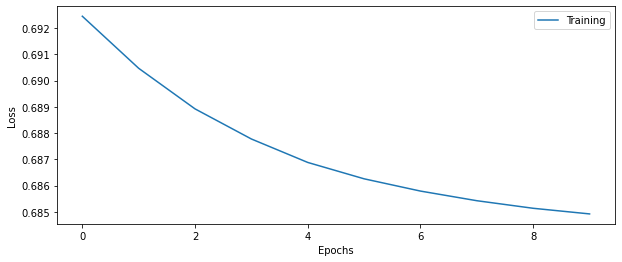

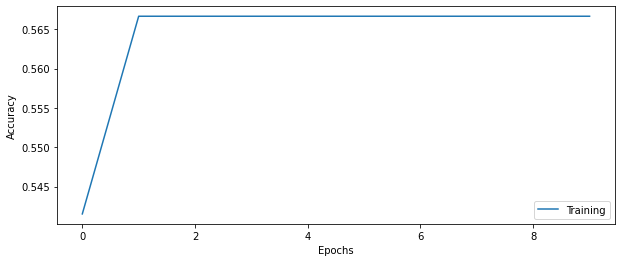

In [637]:
plot_results(history)

In [638]:
import warnings
warnings.filterwarnings("ignore")
Y_pred = model.predict_classes(X_test_Model)

In [639]:
print(classification_report(Y_test_Model, Y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65      2213
           1       0.00      0.00      0.00      2362

    accuracy                           0.48      4575
   macro avg       0.24      0.50      0.33      4575
weighted avg       0.23      0.48      0.32      4575



Training accuracy is not increasing so changing layer configurations. and using different loss function. 

In [640]:
embedding_vector_features = 40
model2 = keras.Sequential([
      keras.layers.Embedding(5000, embedding_vector_features, input_length = 20),
      keras.layers.LSTM(200, return_sequences = False),
      keras.layers.Dense(1, activation = 'sigmoid')
   ])

model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_52 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
lstm_90 (LSTM)               (None, 200)               192800    
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 201       
Total params: 393,001
Trainable params: 393,001
Non-trainable params: 0
_________________________________________________________________


In [641]:
batch_size = 1000
epochs = 10

history2 = model2.fit(x = X_train,
                    y = Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1 #,
                    # validation_data = (X_valid, Y_valid)
                    )

Epoch 1/10
19/19 [==============================] - 12s 623ms/step - loss: 0.6464 - accuracy: 0.5931
Epoch 2/10
19/19 [==============================] - 12s 626ms/step - loss: 0.4166 - accuracy: 0.8113
Epoch 3/10
19/19 [==============================] - 12s 607ms/step - loss: 0.2963 - accuracy: 0.8686
Epoch 4/10
19/19 [==============================] - 12s 635ms/step - loss: 0.2465 - accuracy: 0.8992
Epoch 5/10
19/19 [==============================] - 13s 664ms/step - loss: 0.2148 - accuracy: 0.9136
Epoch 6/10
19/19 [==============================] - 12s 628ms/step - loss: 0.1915 - accuracy: 0.9257
Epoch 7/10
19/19 [==============================] - 13s 661ms/step - loss: 0.1775 - accuracy: 0.9325
Epoch 8/10
19/19 [==============================] - 13s 666ms/step - loss: 0.1618 - accuracy: 0.9386
Epoch 9/10
19/19 [==============================] - 13s 660ms/step - loss: 0.1508 - accuracy: 0.9445
Epoch 10/10
19/19 [==============================] - 12s 656ms/step - loss: 0.1333 - accura

In [642]:
score_1 = model2.evaluate(X_train, Y_train, verbose=1)
score_2 = model2.evaluate(X_valid, Y_valid, verbose=1)

143/143 [==============================] - 7s 49ms/step - loss: 2.2683 - accuracy: 0.5578


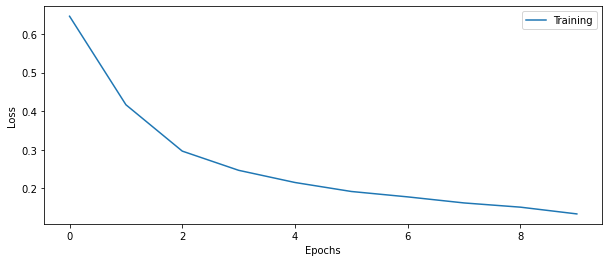

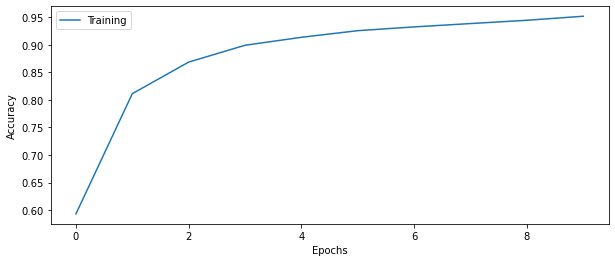

In [643]:
plot_results(history2)

In [558]:
Y_pred2 = model2.predict_classes(X_test_Model)
print(classification_report(Y_test_Model, Y_pred2))

              precision    recall  f1-score   support

           0       0.53      0.63      0.58      2213
           1       0.58      0.47      0.52      2362

    accuracy                           0.55      4575
   macro avg       0.55      0.55      0.55      4575
weighted avg       0.55      0.55      0.55      4575



In [559]:
batch_size = 1000
epochs =4

embedding_vector_features = 40
model3 = keras.Sequential([
      keras.layers.Embedding(5000, embedding_vector_features, input_length = 20),
      keras.layers.LSTM(100, return_sequences = True),
      keras.layers.LSTM(100),
      keras.layers.Dense(1, activation = 'sigmoid')
   ])

model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model3.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
lstm_69 (LSTM)               (None, 20, 100)           56400     
_________________________________________________________________
lstm_70 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 101       
Total params: 336,901
Trainable params: 336,901
Non-trainable params: 0
_________________________________________________________________


In [560]:
history3 = model3.fit(x = X_train,
                    y = Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data = (X_valid, Y_valid)
                    )

Epoch 1/4
11/11 [==============================] - 15s 1s/step - loss: 0.6803 - accuracy: 0.5657 - val_loss: 0.6548 - val_accuracy: 0.5789
Epoch 2/4
11/11 [==============================] - 6s 559ms/step - loss: 0.5543 - accuracy: 0.7045 - val_loss: 0.5190 - val_accuracy: 0.7317
Epoch 3/4
11/11 [==============================] - 6s 554ms/step - loss: 0.3696 - accuracy: 0.8395 - val_loss: 0.4191 - val_accuracy: 0.8022
Epoch 4/4
11/11 [==============================] - 6s 559ms/step - loss: 0.2722 - accuracy: 0.8852 - val_loss: 0.3876 - val_accuracy: 0.8175


In [561]:
score_1 = model3.evaluate(X_train, Y_train, verbose=1)
score_2 = model3.evaluate(X_valid, Y_valid, verbose=1)

229/229 [==============================] - 3s 13ms/step - loss: 0.3876 - accuracy: 0.8175


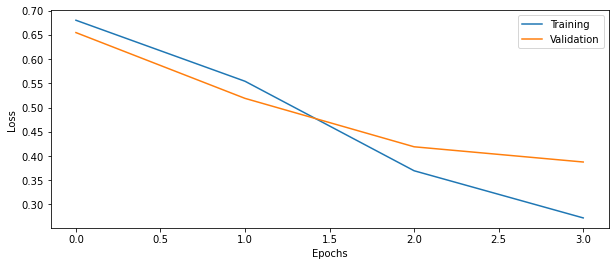

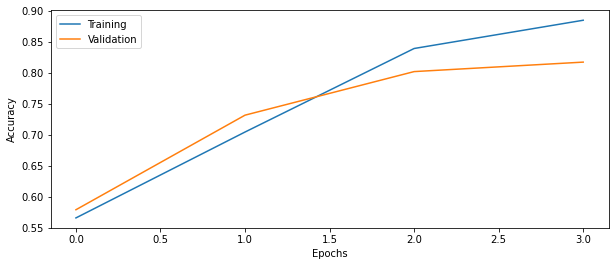

In [562]:
plot_results(history3)

In [563]:
Y_pred3 = model3.predict_classes(X_test_Model)
print(classification_report(Y_test_Model, Y_pred3))

              precision    recall  f1-score   support

           0       0.53      0.63      0.58      2213
           1       0.58      0.48      0.53      2362

    accuracy                           0.56      4575
   macro avg       0.56      0.56      0.55      4575
weighted avg       0.56      0.56      0.55      4575



In [564]:
batch_size = 1000
epochs =5

embedding_vector_features = 40
model4 = keras.Sequential([
      keras.layers.Embedding(5000, embedding_vector_features, input_length = 20),
      keras.layers.LSTM(100, return_sequences = True),
      keras.layers.LSTM(100),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation = 'sigmoid')
   ])

model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model4.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
lstm_71 (LSTM)               (None, 20, 100)           56400     
_________________________________________________________________
lstm_72 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_40 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 101       
Total params: 336,901
Trainable params: 336,901
Non-trainable params: 0
_________________________________________________________________


In [565]:
epochs = 5
history4 = model4.fit(x = X_train,
                    y = Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data = (X_valid, Y_valid)
                    )

Epoch 1/5
11/11 [==============================] - 7s 607ms/step - loss: 0.6805 - accuracy: 0.5621 - val_loss: 0.6524 - val_accuracy: 0.5808
Epoch 2/5
11/11 [==============================] - 6s 545ms/step - loss: 0.5450 - accuracy: 0.7145 - val_loss: 0.5157 - val_accuracy: 0.7416
Epoch 3/5
11/11 [==============================] - 6s 542ms/step - loss: 0.3611 - accuracy: 0.8463 - val_loss: 0.4199 - val_accuracy: 0.8069
Epoch 4/5
11/11 [==============================] - 6s 542ms/step - loss: 0.2673 - accuracy: 0.8893 - val_loss: 0.4068 - val_accuracy: 0.8157
Epoch 5/5
11/11 [==============================] - 6s 544ms/step - loss: 0.2134 - accuracy: 0.9159 - val_loss: 0.4430 - val_accuracy: 0.8139


In [566]:
score_1 = model4.evaluate(X_train, Y_train, verbose=1)
score_2 = model4.evaluate(X_valid, Y_valid, verbose=1)

229/229 [==============================] - 3s 13ms/step - loss: 0.4430 - accuracy: 0.8139


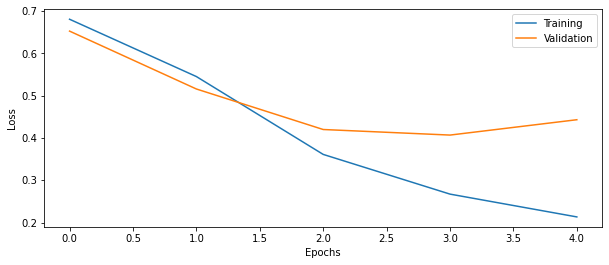

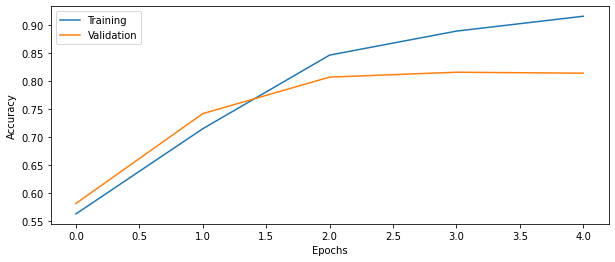

In [567]:
plot_results(history4)

In [568]:
Y_pred4 = model4.predict_classes(X_test_Model)
print(classification_report(Y_test_Model, Y_pred4))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58      2213
           1       0.58      0.49      0.53      2362

    accuracy                           0.56      4575
   macro avg       0.56      0.56      0.56      4575
weighted avg       0.56      0.56      0.55      4575



In [569]:
batch_size = 1000
epochs =10

embedding_vector_features = 40
model5 = keras.Sequential([
      keras.layers.Embedding(5000, embedding_vector_features, input_length = 20),
      keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = False)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation = 'sigmoid')
   ])

model5.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model5.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_42 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
bidirectional_36 (Bidirectio (None, 200)               112800    
_________________________________________________________________
dropout_41 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


In [570]:
history5 = model5.fit(x = X_train,
                    y = Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data = (X_valid, Y_valid)
                    )

Epoch 1/10
11/11 [==============================] - 6s 501ms/step - loss: 0.6837 - accuracy: 0.5567 - val_loss: 0.6682 - val_accuracy: 0.5703
Epoch 2/10
11/11 [==============================] - 5s 438ms/step - loss: 0.6143 - accuracy: 0.6248 - val_loss: 0.4770 - val_accuracy: 0.8000
Epoch 3/10
11/11 [==============================] - 5s 443ms/step - loss: 0.3730 - accuracy: 0.8377 - val_loss: 0.3650 - val_accuracy: 0.8303
Epoch 4/10
11/11 [==============================] - 5s 440ms/step - loss: 0.2517 - accuracy: 0.8978 - val_loss: 0.3575 - val_accuracy: 0.8445
Epoch 5/10
11/11 [==============================] - 5s 438ms/step - loss: 0.1920 - accuracy: 0.9209 - val_loss: 0.3950 - val_accuracy: 0.8470
Epoch 6/10
11/11 [==============================] - 5s 443ms/step - loss: 0.1432 - accuracy: 0.9492 - val_loss: 0.4282 - val_accuracy: 0.8440
Epoch 7/10
11/11 [==============================] - 5s 437ms/step - loss: 0.1083 - accuracy: 0.9646 - val_loss: 0.5094 - val_accuracy: 0.8365
Epoch 

In [571]:
score_1 = model5.evaluate(X_train, Y_train, verbose=1)
score_2 = model5.evaluate(X_valid, Y_valid, verbose=1)

229/229 [==============================] - 3s 13ms/step - loss: 0.7535 - accuracy: 0.8254


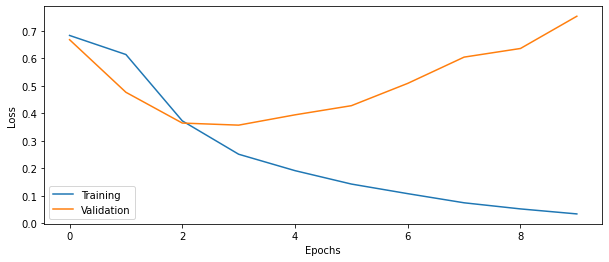

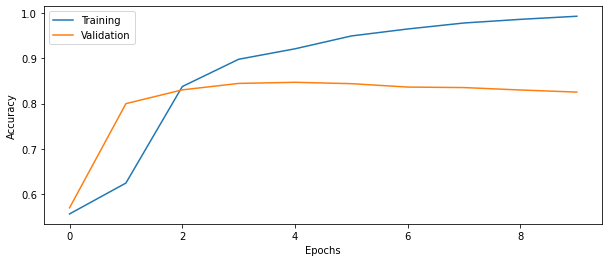

In [572]:
plot_results(history5)

In [573]:
Y_pred5 = model5.predict_classes(X_test_Model)
print(classification_report(Y_test_Model, Y_pred5))

              precision    recall  f1-score   support

           0       0.54      0.63      0.58      2213
           1       0.59      0.49      0.53      2362

    accuracy                           0.56      4575
   macro avg       0.56      0.56      0.56      4575
weighted avg       0.56      0.56      0.56      4575



In [574]:
batch_size = 1000
epochs =5

embedding_vector_features = 40
model6 = keras.Sequential([
      keras.layers.Embedding(5000, embedding_vector_features, input_length = 20),
      keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = True)),
      keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = False)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation = 'sigmoid')
   ])

model6.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model6.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
bidirectional_37 (Bidirectio (None, 20, 200)           112800    
_________________________________________________________________
bidirectional_38 (Bidirectio (None, 200)               240800    
_________________________________________________________________
dropout_42 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 201       
Total params: 553,801
Trainable params: 553,801
Non-trainable params: 0
_________________________________________________________________


In [575]:
history6 = model6.fit(x = X_train,
                    y = Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data = (X_valid, Y_valid)
                    )

Epoch 1/5
11/11 [==============================] - 14s 1s/step - loss: 0.6774 - accuracy: 0.5590 - val_loss: 0.6417 - val_accuracy: 0.5856
Epoch 2/5
11/11 [==============================] - 13s 1s/step - loss: 0.4835 - accuracy: 0.7711 - val_loss: 0.4730 - val_accuracy: 0.8179
Epoch 3/5
11/11 [==============================] - 13s 1s/step - loss: 0.2774 - accuracy: 0.8835 - val_loss: 0.3551 - val_accuracy: 0.8419
Epoch 4/5
11/11 [==============================] - 13s 1s/step - loss: 0.1910 - accuracy: 0.9269 - val_loss: 0.4028 - val_accuracy: 0.8462
Epoch 5/5
11/11 [==============================] - 14s 1s/step - loss: 0.1238 - accuracy: 0.9597 - val_loss: 0.4763 - val_accuracy: 0.8404


In [576]:
score_1 = model6.evaluate(X_train, Y_train, verbose=1)
score_2 = model6.evaluate(X_valid, Y_valid, verbose=1)

229/229 [==============================] - 6s 27ms/step - loss: 0.4763 - accuracy: 0.8404


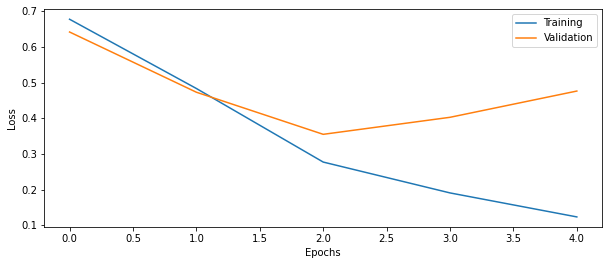

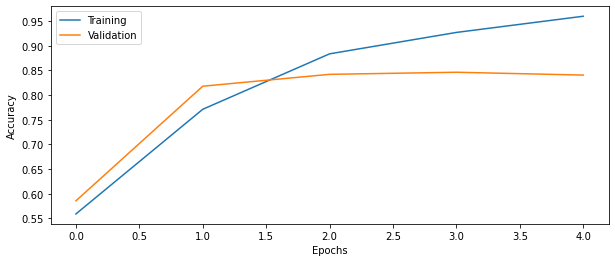

In [577]:
plot_results(history6)

In [578]:
Y_pred6 = model6.predict_classes(X_test_Model)
print(classification_report(Y_test_Model, Y_pred6))

              precision    recall  f1-score   support

           0       0.54      0.64      0.59      2213
           1       0.59      0.48      0.53      2362

    accuracy                           0.56      4575
   macro avg       0.56      0.56      0.56      4575
weighted avg       0.57      0.56      0.56      4575



In [579]:
embedding_vector_features = 40
model7 = keras.Sequential([
        keras.layers.Embedding(5000, embedding_vector_features, input_length = 20),
        keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = True)),
        keras.layers.Dropout(0.3),
        keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = True)),
        keras.layers.Dropout(0.3),
        keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = False)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation = 'sigmoid')
   ])

model7.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model7.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_44 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
bidirectional_39 (Bidirectio (None, 20, 200)           112800    
_________________________________________________________________
dropout_43 (Dropout)         (None, 20, 200)           0         
_________________________________________________________________
bidirectional_40 (Bidirectio (None, 20, 200)           240800    
_________________________________________________________________
dropout_44 (Dropout)         (None, 20, 200)           0         
_________________________________________________________________
bidirectional_41 (Bidirectio (None, 200)               240800    
_________________________________________________________________
dropout_45 (Dropout)         (None, 200)             

In [580]:
batch_size = 1000
epochs =5

history7 = model7.fit(x = X_train,
                    y = Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data = (X_valid, Y_valid)
                    )

Epoch 1/5
11/11 [==============================] - 25s 2s/step - loss: 0.6694 - accuracy: 0.5793 - val_loss: 0.5879 - val_accuracy: 0.7788
Epoch 2/5
11/11 [==============================] - 23s 2s/step - loss: 0.4116 - accuracy: 0.8313 - val_loss: 0.3750 - val_accuracy: 0.8277
Epoch 3/5
11/11 [==============================] - 24s 2s/step - loss: 0.2567 - accuracy: 0.8985 - val_loss: 0.4259 - val_accuracy: 0.8433
Epoch 4/5
11/11 [==============================] - 23s 2s/step - loss: 0.1860 - accuracy: 0.9282 - val_loss: 0.3723 - val_accuracy: 0.8409
Epoch 5/5
11/11 [==============================] - 24s 2s/step - loss: 0.1337 - accuracy: 0.9578 - val_loss: 0.5681 - val_accuracy: 0.8346


In [581]:
score_1 = model7.evaluate(X_train, Y_train, verbose=1)
score_2 = model7.evaluate(X_valid, Y_valid, verbose=1)

229/229 [==============================] - 13s 56ms/step - loss: 0.5681 - accuracy: 0.8346


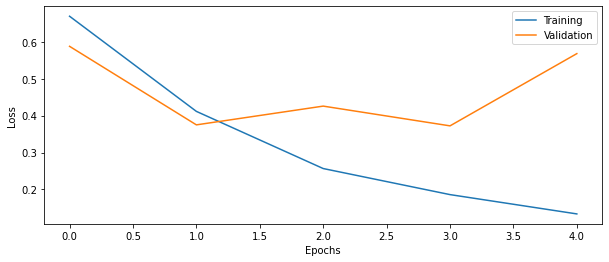

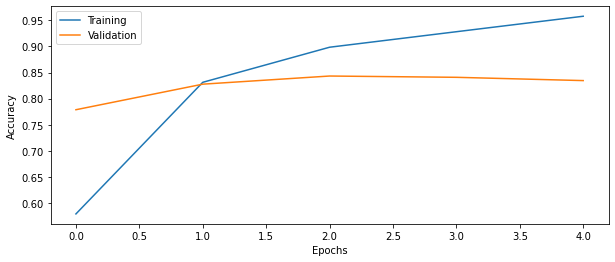

In [582]:
plot_results(history7)

In [583]:
Y_pred7 = model7.predict_classes(X_test_Model)
print(classification_report(Y_test_Model, Y_pred7))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57      2213
           1       0.58      0.52      0.55      2362

    accuracy                           0.56      4575
   macro avg       0.56      0.56      0.56      4575
weighted avg       0.56      0.56      0.56      4575



In [584]:
embedding_vector_features = 80
model8 = keras.Sequential([
        keras.layers.Embedding(8000, embedding_vector_features, input_length = 20),
        keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = True)),
        keras.layers.Dropout(0.5),
        keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = True)),
        keras.layers.Dropout(0.5),
        keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = True)),
        keras.layers.Dropout(0.5),
        keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = True)),
        keras.layers.Dropout(0.5),
        keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = False)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation = 'sigmoid')
   ])

model8.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model8.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_45 (Embedding)     (None, 20, 80)            640000    
_________________________________________________________________
bidirectional_42 (Bidirectio (None, 20, 200)           144800    
_________________________________________________________________
dropout_46 (Dropout)         (None, 20, 200)           0         
_________________________________________________________________
bidirectional_43 (Bidirectio (None, 20, 200)           240800    
_________________________________________________________________
dropout_47 (Dropout)         (None, 20, 200)           0         
_________________________________________________________________
bidirectional_44 (Bidirectio (None, 20, 200)           240800    
_________________________________________________________________
dropout_48 (Dropout)         (None, 20, 200)         

In [585]:
batch_size = 1000
epochs =5

history8 = model8.fit(x = X_train,
                    y = Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data = (X_valid, Y_valid)
                    )

Epoch 1/5
11/11 [==============================] - 48s 4s/step - loss: 0.6514 - accuracy: 0.6143 - val_loss: 0.4419 - val_accuracy: 0.7970
Epoch 2/5
11/11 [==============================] - 46s 4s/step - loss: 0.3573 - accuracy: 0.8498 - val_loss: 0.3634 - val_accuracy: 0.8380
Epoch 3/5
11/11 [==============================] - 46s 4s/step - loss: 0.2335 - accuracy: 0.9126 - val_loss: 0.3831 - val_accuracy: 0.8454
Epoch 4/5
11/11 [==============================] - 48s 4s/step - loss: 0.1534 - accuracy: 0.9531 - val_loss: 0.5148 - val_accuracy: 0.8425
Epoch 5/5
11/11 [==============================] - 53s 5s/step - loss: 0.0934 - accuracy: 0.9736 - val_loss: 0.5366 - val_accuracy: 0.8398


In [586]:
score_1 = model8.evaluate(X_train, Y_train, verbose=1)
score_2 = model8.evaluate(X_valid, Y_valid, verbose=1)

229/229 [==============================] - 28s 124ms/step - loss: 0.5366 - accuracy: 0.8398


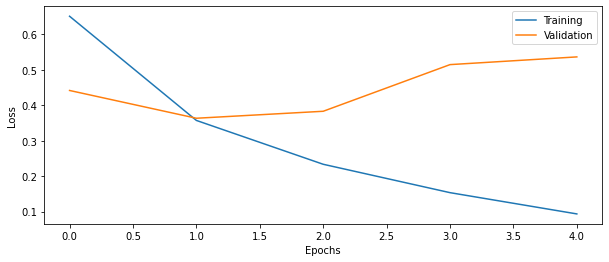

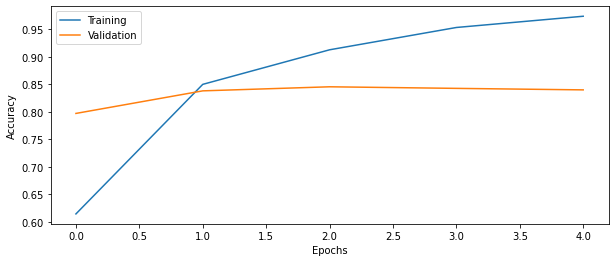

In [587]:
plot_results(history8)

In [588]:
Y_pred8 = model8.predict_classes(X_test_Model)
print(classification_report(Y_test_Model, Y_pred8))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58      2213
           1       0.58      0.47      0.52      2362

    accuracy                           0.55      4575
   macro avg       0.56      0.56      0.55      4575
weighted avg       0.56      0.55      0.55      4575



### Reconsideration 

It can be seen that model is not able to generalise with test well so instead of considering all features, will test alone with articles text and will ignore additional information about author and article titile while training model.

In [589]:
train_X2 = train_data.text
test_X2 = test_data.text

In [590]:
train_pp = preprocess(data = train_X2)
test_pp = preprocess(data = test_X2)

In [591]:
train_one_hot = [one_hot(word, 5000) for word in train_pp]
test_one_hot  = [one_hot(word , 5000) for word in test_pp]

In [592]:
padding_train = pad_sequences(train_one_hot, maxlen = 20, padding = 'pre')
padding_test  = pad_sequences(test_one_hot, maxlen = 20, padding = 'pre')

In [593]:
train_X_2 = np.array(padding_train)
#Y_train
test_X_2 = np.array(padding_test)
#Y_test_Model

In [594]:
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(train_X_2, Y_final, test_size = 0.4, random_state = 12345)

In [647]:
X_train_2 = train_X_2
Y_train_2 = Y_final
X_valid_2 = test_X_2
Y_valid_2 = Y_test_Model

In [646]:
embedding_vector_features = 40
model9 = keras.Sequential([
      keras.layers.Embedding(5000, embedding_vector_features, input_length = 20),
      keras.layers.LSTM(100),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation = 'sigmoid')
   ])

model9.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model9.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_54 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
lstm_92 (LSTM)               (None, 100)               56400     
_________________________________________________________________
dropout_57 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [648]:
batch_size = 1000
epochs =9

history9 = model9.fit(x = X_train_2,
                    y = Y_train_2,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data = (X_valid_2, Y_valid_2)
                    )

Epoch 1/9
19/19 [==============================] - 10s 515ms/step - loss: 0.6704 - accuracy: 0.5683 - val_loss: 0.7190 - val_accuracy: 0.5150
Epoch 2/9
19/19 [==============================] - 11s 553ms/step - loss: 0.4736 - accuracy: 0.7753 - val_loss: 0.9370 - val_accuracy: 0.5519
Epoch 3/9
19/19 [==============================] - 13s 660ms/step - loss: 0.3245 - accuracy: 0.8609 - val_loss: 1.1434 - val_accuracy: 0.5598
Epoch 4/9
19/19 [==============================] - 11s 584ms/step - loss: 0.2650 - accuracy: 0.8888 - val_loss: 1.3303 - val_accuracy: 0.5589
Epoch 5/9
19/19 [==============================] - 12s 613ms/step - loss: 0.2282 - accuracy: 0.9098 - val_loss: 1.3812 - val_accuracy: 0.5604
Epoch 6/9
19/19 [==============================] - 10s 514ms/step - loss: 0.2028 - accuracy: 0.9214 - val_loss: 1.5868 - val_accuracy: 0.5628
Epoch 7/9
19/19 [==============================] - 10s 542ms/step - loss: 0.1841 - accuracy: 0.9297 - val_loss: 1.5886 - val_accuracy: 0.5591
Epoch 

In [649]:
score_1 = model9.evaluate(X_train_2, Y_train_2, verbose=1)
score_2 = model9.evaluate(X_valid_2, Y_valid_2, verbose=1)

143/143 [==============================] - 4s 27ms/step - loss: 1.8717 - accuracy: 0.5635


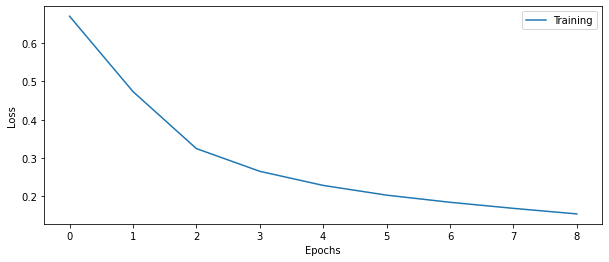

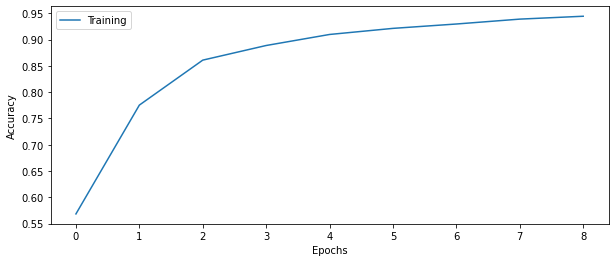

In [650]:
plot_results(history9)

In [651]:
Y_pred9 = model9.predict_classes(test_X_2)
print(classification_report(Y_test_Model, Y_pred9))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58      2213
           1       0.59      0.51      0.54      2362

    accuracy                           0.56      4575
   macro avg       0.57      0.57      0.56      4575
weighted avg       0.57      0.56      0.56      4575



In [600]:
embedding_vector_features = 40
model10 = keras.Sequential([
      keras.layers.Embedding(5000, embedding_vector_features, input_length = 20),
      keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = False)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation = 'sigmoid')
   ])

model10.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model10.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_47 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
bidirectional_47 (Bidirectio (None, 200)               112800    
_________________________________________________________________
dropout_52 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


In [601]:
embedding_vector_features = 40
model5 = keras.Sequential([
      keras.layers.Embedding(5000, embedding_vector_features, input_length = 20),
      keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences = False)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation = 'sigmoid')
   ])

In [602]:
batch_size = 1000
epochs =9

history10 = model10.fit(x = X_train_2,
                    y = Y_train_2,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data = (X_valid_2, Y_valid_2)
                    )

Epoch 1/9
11/11 [==============================] - 7s 676ms/step - loss: 0.6830 - accuracy: 0.5619 - val_loss: 0.6657 - val_accuracy: 0.5703
Epoch 2/9
11/11 [==============================] - 7s 614ms/step - loss: 0.5994 - accuracy: 0.6414 - val_loss: 0.4307 - val_accuracy: 0.8142
Epoch 3/9
11/11 [==============================] - 7s 602ms/step - loss: 0.3527 - accuracy: 0.8499 - val_loss: 0.3660 - val_accuracy: 0.8324
Epoch 4/9
11/11 [==============================] - 7s 605ms/step - loss: 0.2425 - accuracy: 0.9043 - val_loss: 0.3632 - val_accuracy: 0.8463
Epoch 5/9
11/11 [==============================] - 7s 602ms/step - loss: 0.1899 - accuracy: 0.9260 - val_loss: 0.3813 - val_accuracy: 0.8470
Epoch 6/9
11/11 [==============================] - 7s 609ms/step - loss: 0.1407 - accuracy: 0.9523 - val_loss: 0.4442 - val_accuracy: 0.8476
Epoch 7/9
11/11 [==============================] - 7s 608ms/step - loss: 0.1034 - accuracy: 0.9657 - val_loss: 0.4930 - val_accuracy: 0.8425
Epoch 8/9
11/

In [603]:
score_1 = model10.evaluate(X_train_2, Y_train_2, verbose=1)
score_2 = model10.evaluate(X_valid_2, Y_valid_2, verbose=1)

229/229 [==============================] - 5s 22ms/step - loss: 0.6366 - accuracy: 0.8384


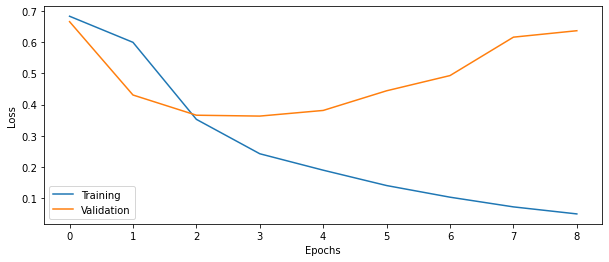

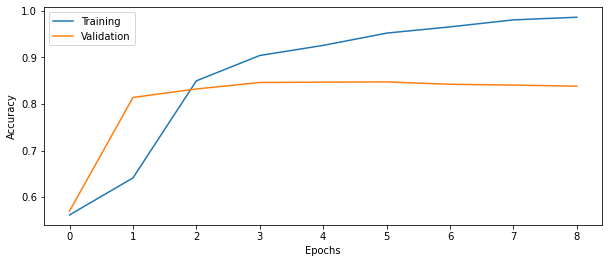

In [604]:
plot_results(history10)

In [605]:
Y_pred10 = model10.predict_classes(test_X_2)
print(classification_report(Y_test_Model, Y_pred10))

              precision    recall  f1-score   support

           0       0.54      0.63      0.58      2213
           1       0.59      0.50      0.54      2362

    accuracy                           0.56      4575
   macro avg       0.56      0.56      0.56      4575
weighted avg       0.57      0.56      0.56      4575



In [625]:
embedding_vector_features = 40
model11 = keras.Sequential([
      keras.layers.Embedding(5000, embedding_vector_features, input_length = 20),
      keras.layers.LSTM(100),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation = 'sigmoid')
   ])

model11.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model11.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_50 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
lstm_88 (LSTM)               (None, 100)               56400     
_________________________________________________________________
dropout_55 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [626]:
batch_size = 1000
epochs =3

history11 = model11.fit(x = X_train_2,
                    y = Y_train_2,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data = (X_valid_2, Y_valid_2)
                    )

Epoch 1/3
11/11 [==============================] - 7s 670ms/step - loss: 0.6841 - accuracy: 0.5628 - val_loss: 0.6632 - val_accuracy: 0.5822
Epoch 2/3
11/11 [==============================] - 9s 787ms/step - loss: 0.6040 - accuracy: 0.6248 - val_loss: 0.4977 - val_accuracy: 0.7657
Epoch 3/3
11/11 [==============================] - 9s 799ms/step - loss: 0.4328 - accuracy: 0.8073 - val_loss: 0.4405 - val_accuracy: 0.8046


In [627]:
score_1 = model11.evaluate(X_train_2, Y_train_2, verbose=1)
score_2 = model11.evaluate(X_valid_2, Y_valid_2, verbose=1)

229/229 [==============================] - 5s 24ms/step - loss: 0.4405 - accuracy: 0.8046


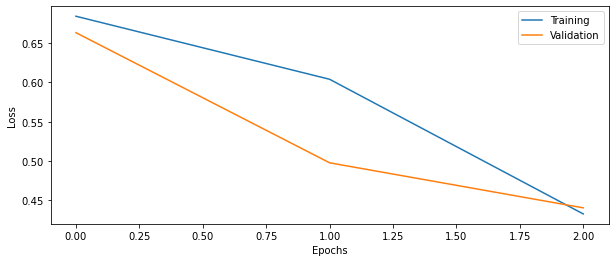

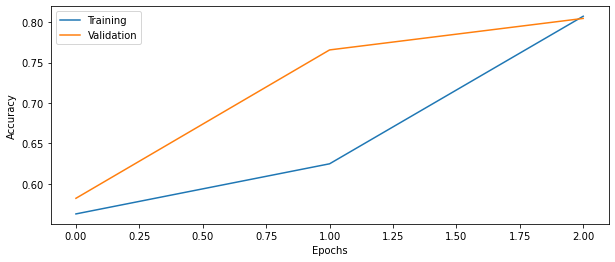

In [628]:
plot_results(history11)

In [610]:
Y_pred11 = model11.predict_classes(test_X_2)
print(classification_report(Y_test_Model, Y_pred11))

              precision    recall  f1-score   support

           0       0.52      0.75      0.61      2213
           1       0.60      0.35      0.44      2362

    accuracy                           0.54      4575
   macro avg       0.56      0.55      0.53      4575
weighted avg       0.56      0.54      0.52      4575

